# 신용카드 사용자 연체 예측 AI 경진대회

- 주제: 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 
- 목적: 신용카드 사용자들의 개인 신상정보 데이터로 **사용자의 신용카드 대금 연체 정도를 예측**

- 데이터 설명:
    - **gender :** 고객의 성별, **binary**
    - **car :** 고객의 자차 보유 유무, **binary**
    - **reality :** 고객의 부동산 보유 유무, **binary**
    - **child_num :** 고객의 자녀 수, **integer**
    - **income_total :** 고객의 총 소득, **numeric**
    - **income_type :** 고객의 소득 유형, **category**
    - **edu_type :** 고객의 최종 학력, **category**
    - **family_type :** 고객의 본인의 혼인관련 상태, **category**
    - **house_type :** 고객의 거주지 형태, **category**
    - **DAYS_BIRTH :** (고객의 생일) - (현재 일), **integer**, **numeric**
    - **DAYS_EMPLOYED :** (고객의 첫 고용일) - (현재 일), **numeric**
    - **FLAG_MOBIL :** 고객의 본인 휴대폰 전화번호 등록 여부, **binary**
    - **work_phone :** 고객의 본인 직장 전화번호 등록 여부, **binary**
    - **phone :** 고객의 집 전화번호 등록 여부, **binary**
    - **email :** 고객의 이메일 등록여부, **binary**
    - **occyp_type :** 고객의 고용 형태, **category**
    - **family_size :** 고객의 가족의 크기, **integer**, **numeric**
    - **begin_month :** (고객이 카드를 발급한 월) - (현재 월), **integer**, **numeric**  
    
    - **<u>credit</u>** : 해당 신용카드의 대금 연체 정도 (0,1,2 : 커질수록 대금 연체 정도가 높다. target variable)
    
    
## 학습 목표에 대한 논의
### 학습 목표
- ```Credit``` 변수의 클래스 예측.
    - **classes :** 0, 1, 2
    - **description :** 사용자의 신용카드 대금 연체 정도.  
    - 각 값은 **상대적인 크기**에 대한 정보를 가지고 있다.
    - **imbalaced data**

- 다양한 features가 존재하지만 대부분의 feature에서 class의 비율은 일정하다.

- 데이터 관측치의 기준은 **'사용자'**가 아니라 **'카드'**이다. 
    - 카드 정보에만 해당하는 begin_month를 제외하고 모든 값이 일치하는 관측치는 같은 고객이라고 판단한다.
    - 가설) 카드 사용자를 몇 가지 유형으로 분류 할 수 있고, 유형에 따라 begin_month에 해당하는 credit 값들의 기준이 다르다.
    
- 평가기준:
    - **logloss** : 작을수록 좋은 결과


## 분석 방향에 대한 논의
### data anlysis process
1. EDA 
    - 데이터의 분포를 중심으로 탐색
2. Feature engineering
    - 변수 생성시에 어떤 변수가 유의할지, domain knowledge에서 크게 벗어나지 않게 판단하여 생성


In [4]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


sns.set()
sns.set_color_codes()
sns.set_theme(style="ticks", palette="pastel")

print('<Check the versions of modules>')
print("- Seaborn version : ", sns.__version__)

<Check the versions of modules>
- Seaborn version :  0.11.1


In [5]:
# load data
# upload data
train = pd.read_csv('/Users/gangtaro/competition_data/DACON/14thMonthlyDacon/open/train.csv',
                   index_col=0)
test = pd.read_csv('/Users/gangtaro/competition_data/DACON/14thMonthlyDacon/open/test.csv',
                  index_col=0)
submit = pd.read_csv('/Users/gangtaro/competition_data/DACON/14thMonthlyDacon/open/sample_submission.csv')

In [6]:
# shape of data
print(train.shape)
print(test.shape)

(26457, 19)
(10000, 18)


> summary
- 데이터는 총 26457개의 관측치와 총 18개의 feature 그리고 target variable로 이루어져있다.
- public score는 test data의 credit variable 을 예측하는 것으로 총 10000개의 데이터를 예측해야한다.
    
---
## EDA
### target variable: credit

우선적으로 예측해야 되는 class 변수인 ```credit``` 변수를 탐색해본다.

In [9]:
train.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [10]:
train.credit.value_counts(normalize = True)

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64

> summary
- 전체 train data set 에서 target variable의 class ratio는 약 2:1:0 = **0.64 : 0.23 : 0.12**이다. 클래스 간 불균형이다.

### binary variables (이진 변수)
- gender
- car
- reality
- FLAG_MOBIL
- work_phone
- phone
- email

In [16]:
print('<binary variables distribution of the train data>\n')
bin_cols = ['gender', 'car', 'reality', 'FLAG_MOBIL','work_phone', 'phone', 'email']
for cols in bin_cols : 
    print('>>> Column name : {}'.format(cols),'\n')
    print(train[cols].value_counts(),'\n')

<binary variables distribution of the train data>

>>> Column name : gender 

F    17697
M     8760
Name: gender, dtype: int64 

>>> Column name : car 

N    16410
Y    10047
Name: car, dtype: int64 

>>> Column name : reality 

Y    17830
N     8627
Name: reality, dtype: int64 

>>> Column name : FLAG_MOBIL 

1    26457
Name: FLAG_MOBIL, dtype: int64 

>>> Column name : work_phone 

0    20511
1     5946
Name: work_phone, dtype: int64 

>>> Column name : phone 

0    18672
1     7785
Name: phone, dtype: int64 

>>> Column name : email 

0    24042
1     2415
Name: email, dtype: int64 



이진변수의 분포는 다음과 같고, 다음으로는 이진 변수에서 positive 값과 negative 값에서 credit의 분포가 서로 상이하게 다르게 나타나는지 확인해본다.

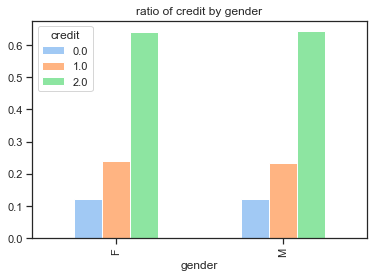

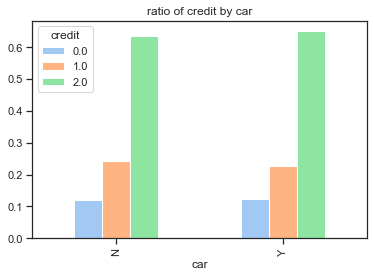

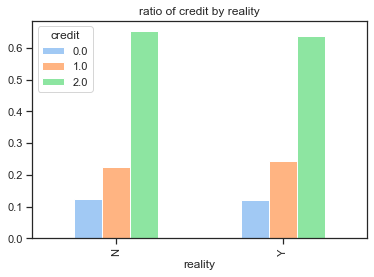

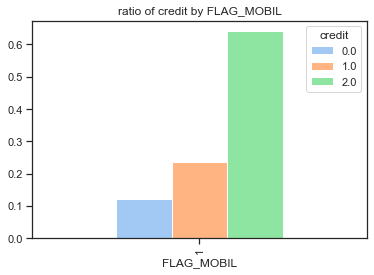

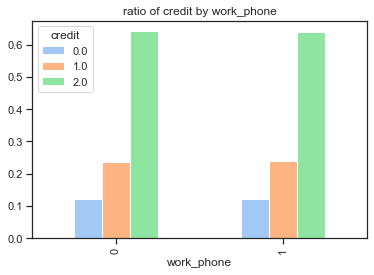

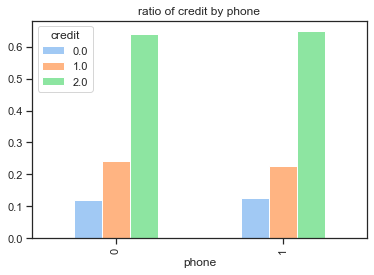

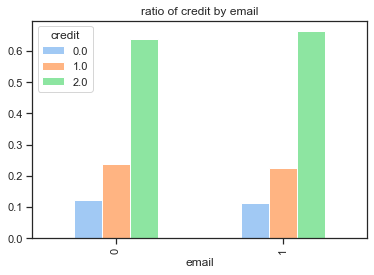

In [17]:
for cols in bin_cols :
    train.groupby(cols).credit.value_counts(normalize = True).unstack().plot(kind = 'bar', title = 'ratio of credit by {}'.format(cols))

> summary
- ```FLAG_MOBIL``` 는 오로지 1값만을 가진다. 가지고 있는 정보가 없으므로 제거해준다.
- 나머지 이진 변수에서는 모두 positive와 negative 사이에 ```credit``` class 비율의 차이가 거의 보이지 않는다.




In [18]:
# Eliminate worthless feature : FLAG_MOBIL (변수 제거)
train.drop('FLAG_MOBIL', axis =1, inplace = True)

# Categorical features with Binary encode (0 or 1; two categories) (변수 수치화)
for bin_feature in ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']:
    train[bin_feature], uniques = pd.factorize(train[bin_feature])

### numeric variables (수치형 변수)
- child_num
- family_size
- income_total
- DAYS_BIRTH
- DAYS_EMPLOYED
- begin_month

#### child_num
- Range :  0, 1, 2, ... ,19 (integer)
- 카드사용자의 자녀 수에 대한 정보를 가진 변수

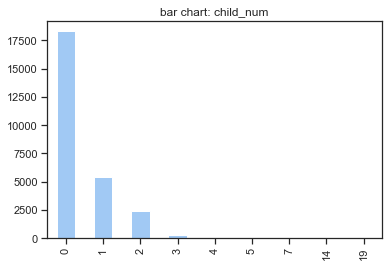

In [22]:
train.child_num.value_counts().sort_index().plot(kind = 'bar')
plt.title('bar chart: child_num')
plt.show()

In [23]:
train.child_num.value_counts().sort_index()

0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
Name: child_num, dtype: int64

> summary
- 대부분의 값이 0, 1, 2, 3에 속한다. (99.76%)
- 극히 일부 값들이 7, 14, 19와 같은 값을 가진다.
    - 이에 대해서 첨언을 하자면, 아이의 수가 5명이나 7명은 있을 수 있는 경우라고 생각하지만 아이의 수가 10을 넘어가는 14, 19를 나타내는 관측치는 **이상치**로 판단하여 제거해주는 선택을 해준다.
    
#### family_size
- Range :  [0, 1, 2, ... ] (integer)
- 본인 및 배우자, 자녀의 수를 합한 변수 또는 현 거주지에 같이 살고있는 가족의 수라고 추정.(본 관측치의 사람들은 모두 성인으로, 가족에 부모님의 수는 고려하지 않는 것으로 추정된다.)

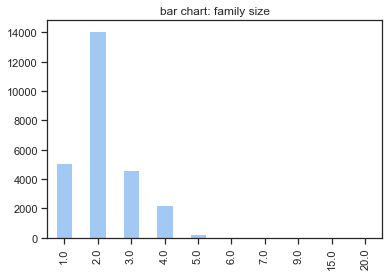

In [27]:
train.family_size.value_counts().sort_index().plot(kind = 'bar')
plt.title('bar chart: family size')
plt.show()

In [28]:
train.family_size.value_counts().sort_index()

1.0      5109
2.0     14106
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
9.0         2
15.0        3
20.0        1
Name: family_size, dtype: int64

> summary
- 2인 가족이 가장 많았고, 1~5인 가족이 대부분을 차지한다.
- ```family_type```변수와 ```child_num```변수와의 관계를 통해 이 변수의 값이 결정된다. (```family_type``` 변수 설명 때 논함)

#### income_total
- Range : [0, inf] (positive-float)
- 카드 사용자의 총 소득에 대한 변수


In [35]:
print('Max   : {}'.format(train.income_total.max()))
print('Min   : {}'.format(train.income_total.min()))

print('Mean  : {}'.format(train.income_total.mean()))
print('Median: {}'.format(train.income_total.median()))

Max   : 1575000.0
Min   : 27000.0
Mean  : 187306.52449257285
Median: 157500.0


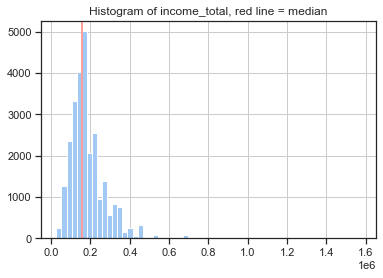

In [47]:
train.income_total.hist(bins = 60)
plt.title('Histogram of income_total, red line = median')
plt.axvline(x = train.income_total.median(), linewidth=2, color='r')
plt.show()

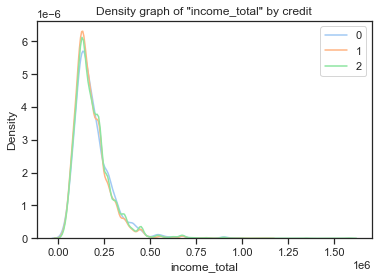

In [46]:
sns.kdeplot(x = 'income_total', data = train[train.credit == 0])
sns.kdeplot(x = 'income_total', data = train[train.credit == 1])
sns.kdeplot(x = 'income_total', data = train[train.credit == 2])
plt.legend([0,1,2])
plt.title('Density graph of "income_total" by credit')
plt.show()

> summary 
- ```credit``` class 별 ```income_total```의 density graph를 봤을때,  모든 ```credit``` class 에서 비슷한 밀도함수 그래프가 나타난다. -> 클래스 별 특징이 뚜렷하지 않아 다른 변수와의 조합을 통해서 좀 더 나은 변수의 생성을 기대 해 볼 수 있다.

#### DAYS_BIRTH
- (태어난 날짜) - (데이터 수집날짜 기준 시점 날짜)
- 나이에 대한 그래프
- 음수. 부호를 변경하면 그 사람이 살아온 DAYS로 의미가 변경되고, 365.25로 나누어서 소수점을 제거하면 당해 년도 그 사람의 나이가 된다.

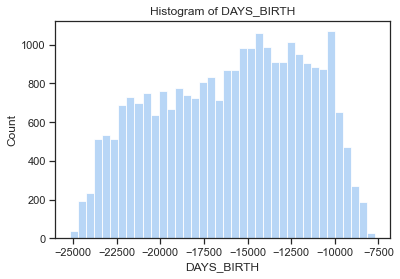

In [48]:
sns.histplot(train.DAYS_BIRTH)
plt.title('Histogram of DAYS_BIRTH')
plt.show()

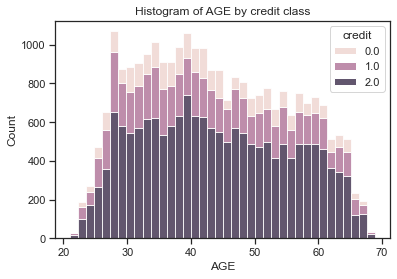

In [50]:
# 카드 사용자들의 나이와 credit class로 구분해주는 histogram
sns.histplot(x = train.DAYS_BIRTH/-365.25, data = train, hue = 'credit', multiple= 'stack')
plt.xlabel('AGE')
plt.title('Histogram of AGE by credit class')
plt.show()

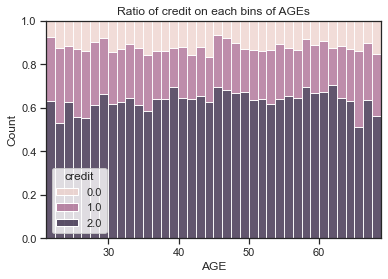

In [71]:
# 카드 사용자들의 나이구간별 credit class의 비율
sns.histplot(x = train.DAYS_BIRTH/-365.25, data = train, hue = 'credit', multiple= 'fill')
plt.xlabel('AGE')
plt.title('Ratio of credit on each bins of AGEs')
plt.show()

In [52]:
print('Max AGE    : {}'.format((train.DAYS_BIRTH/-365.25).max()))
print('Min AGE    : {}'.format((train.DAYS_BIRTH/-365.25).min()))

print('Mean   AGE : {}'.format((train.DAYS_BIRTH/-365.25).mean()))
print('Median AGE : {}'.format((train.DAYS_BIRTH/-365.25).median()))

Max AGE    : 68.86242299794661
Min AGE    : 21.09514031485284
Mean   AGE : 43.69077042786865
Median AGE : 42.56536618754278


> summary 
- 모든 카드사용자들은 **성인**이며 제일 나이가 적은 사용자는 21세이며 최고령자는 68세이다.
- 모든 나이대에서 credit class ratio 가 균일하게 나타난다.

#### DAYS_EMPLOYED
- (일을 시작한 날짜) - (데이터 수집날짜 기준 시점 날짜)
- 해당 카드 사용자의 **근무 기간**과 관련된 변수
- 음수. 부호를 변경해주면 현 시점까지 **근무한 날**로 의미가 변경된다.
- 결측값으로 보이는 값들이 존재한다(**365243**값을 가지는 데이터 다수 존재). 이 수치가 의미하는 바가 무엇인지 파악해야한다.

In [53]:
train.DAYS_EMPLOYED[train.DAYS_EMPLOYED > 0].value_counts()

365243    4438
Name: DAYS_EMPLOYED, dtype: int64

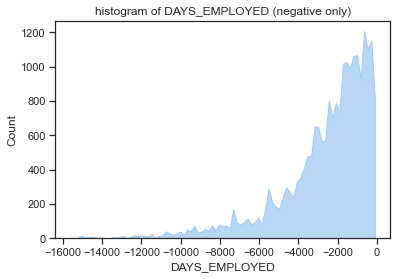

In [54]:
sns.histplot(train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0], element = "poly")
plt.title('histogram of DAYS_EMPLOYED (negative only)')
plt.show()

In [60]:
# 음수 중 최대 값은 -17로 나타난다.
print('Max value of DAYS_EMPLOYED(negative-only) : {} days'.format(train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0].max()))
print('Min value of DAYS_EMPLOYED(negative-only) : {} days -> {} years'.format(train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0].min(), train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0].min()/365.25))

Max value of DAYS_EMPLOYED(negative-only) : -17 days
Min value of DAYS_EMPLOYED(negative-only) : -15713 days -> -43.01984941820671 years


In [65]:
# 365243 값을 가지는 관측치의 occyp_type 변수의 결측 확인
# (Total= 4438, True= 365243값을 가지는 값들 중 occyp_type 결측 개수)
train[train.DAYS_EMPLOYED == 365243].occyp_type.isna().value_counts()

True    4438
Name: occyp_type, dtype: int64

In [66]:
len(train)

26457

> summary
- 365243 값을 가지는 값들은 26457개의 관측치 중 **4438개**
- ```occyp_type```라는 직업유형에 관련된 변수에서 전부 **결측치**로 발견된 점과 각 변수가 가진 의미로 미루어보아 근무기간이 0이라고 판단 가능하다.
- 따라서 365243 값을 가지는 모든 관측치를 0으로 변경해준다.



In [68]:
train['DAYS_EMPLOYED'][train['DAYS_EMPLOYED'] == 365243] = 0

#### begin_month
- (카드 사용자가 해당 카드를 발급한 날짜) - (데이터 수집날짜 기준 시점 날짜)
- 음수. 부호를 바꾸면 **해당 발급 후 경과된 개월 수**로 의미가 변경된다.

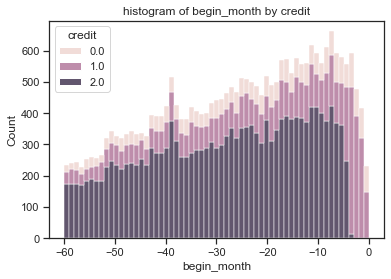

In [70]:
sns.histplot(x = 'begin_month', bins = 61, hue = 'credit', data = train, multiple = 'stack' )
plt.title('histogram of begin_month by credit')
plt.show()

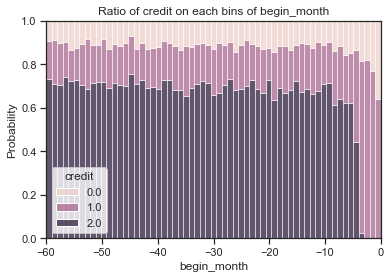

In [72]:
sns.histplot(x = 'begin_month', bins = 61, stat = 'probability',hue = 'credit', data = train, multiple = 'fill' )
plt.title('Ratio of credit on each bins of begin_month')
plt.show()

In [74]:
print('Max begin_month : {}'.format((-train.begin_month).max()))
print('Min begin_month : {}'.format((-train.begin_month).min()))

Max begin_month : 60.0
Min begin_month : -0.0


In [86]:
'proportion of credit==2 when lower than 4 months : {}%'.format(len(train[(train.begin_month >= -3)&(train.credit == 2)]) / len(train[(train.begin_month >= -3)])*100)

'proportion of credit==2 when lower than 4 months : 0.8736167734420501%'

> summary
- 0개월부터 60개월까지의 정수 구간 내의 값을 가진다.
- 발급 받은지 3개월 이내의 카드들은 credit==2 의 비율이 **매우 낮다.** (0.87%; 1퍼도 되지 않는다.)
- 발급 기간별 ```credit``` class 비율의 극명히 차이나는 구간이 분명이 존재하는 것으로 보인다.


### categorial variables
- income_type
- edu_type
- family_type
- house_type
- occyp_type

#### income_type
- 소득유형에 따른 분류

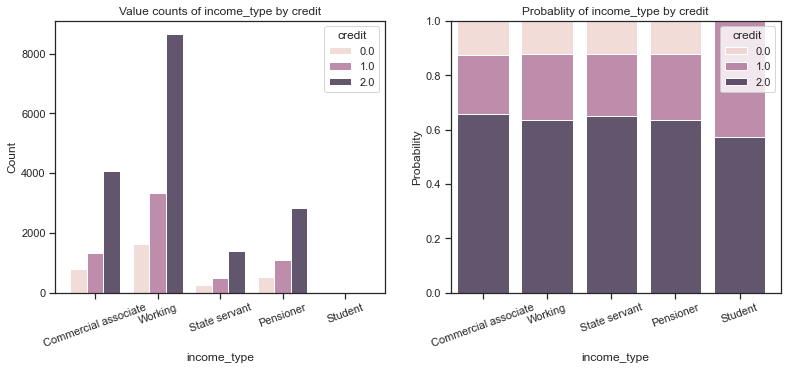

In [87]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(x = 'income_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of income_type by credit')
plt.xticks(rotation = 20)

plt.subplot(1,2,2)
sns.histplot(x = 'income_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of income_type by credit')
plt.xticks(rotation = 20)
plt.show()

In [88]:
train.income_type.value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

> summary
- 총 5개의 소득 유형에 대한 범주로 변수가 구성되어있다.
- 해당 범주의 이름으로 보아 소득 유형은 어떤 업계에 종사 하고 있는지에 대한 변수로 짐작이 가능하며, ```occyp_type``` 변수의 상위 범주라고 판단된다.
- 각 범주에 대하여 ```credit``` class의 비율이 상이하지 않다.
- **Student** 범주가 7개의 아주 적은 관측치가 발견된다.
- 하지만 지우거나 다른 범주에 편입 시키기에는 많은 정보가 없고 기준으로 삼을만한 변수도 딱히 존재하지 않으므로 그대로 두는 것이 올바른 판단이라 생각된다.

#### edu_type
- 카드 사용자의 최종학력에 대한 변수
- 총 5개의 범주로 구분되어있으며, 다음과 같이 더 크다는 순으로 학력이 높다고 알려져있다.
- 'Academic degree' > 'Higher education' > 'Incomplete higher' > 'Secondary' / 'second special' > 'Lower secondary'

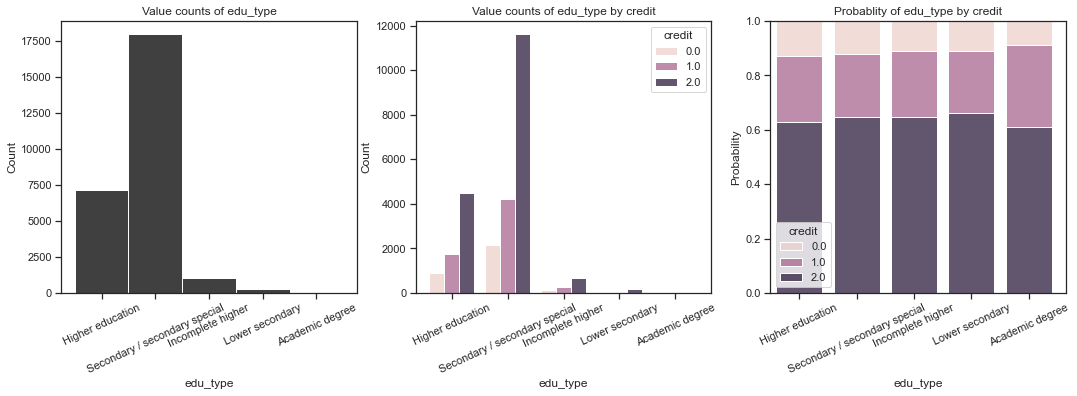

In [93]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(x = 'edu_type', stat = 'count', data = train, color = 'black')
plt.title('Value counts of edu_type')
plt.xticks(rotation = 25)

plt.subplot(1,3,2)
sns.histplot(x = 'edu_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of edu_type by credit')
plt.xticks(rotation = 25)

plt.subplot(1,3,3)
sns.histplot(x = 'edu_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of edu_type by credit')
plt.xticks(rotation = 25)
plt.show()

> summary
- 학력의 차이에 따라 ```credit``` class의 비율은 차이가 없는것으로 보인다.

#### family_type
- 카드 사용자의 **배우자** 유무에 초점을 둔 **가족 구성 유형** 변수
- 범주 구성: 기혼, 법률혼, 미혼, 과부, 이혼

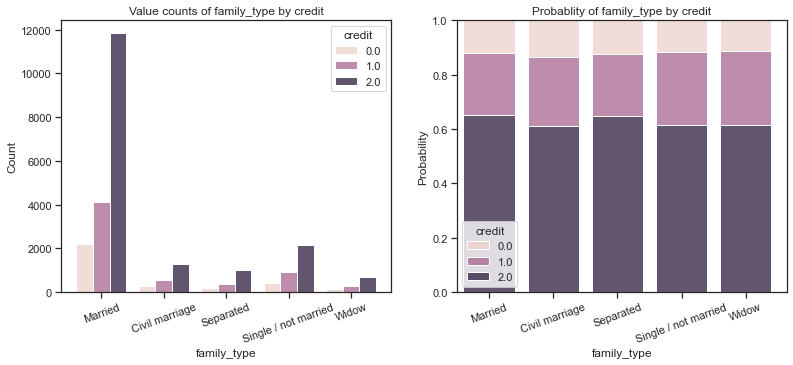

In [97]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(x = 'family_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of family_type by credit')
plt.xticks(rotation = 20)

plt.subplot(1,2,2)
sns.histplot(x = 'family_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of family_type by credit')
plt.xticks(rotation = 20)
plt.show()

In [100]:
print('<아이를 제외한 가족의 수>\n')
for f_type in train.family_type.unique() : 
    print('*',f_type)
    print((train.family_size - train.child_num).loc[train.family_type == f_type].value_counts())
    print()

<아이를 제외한 가족의 수>

* Married
 2.0    18193
 0.0        2
-1.0        1
dtype: int64

* Civil marriage
2.0    2122
0.0       1
dtype: int64

* Separated
1.0    1539
dtype: int64

* Single / not married
1.0    3478
2.0      16
0.0       2
dtype: int64

* Widow
1.0    1103
dtype: int64



> summary
- 